<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df.head()
df_unedited = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [73]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


We can see that in the price column, the 75th percentile value is 11950.000000 and the max value is 32500.000000. This is a very sudden jump and indicates presence of outliers. I will remove these outliers


In [74]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

df = df[df['Price'] <= upper_limit]


In [75]:
df.shape

(1326, 11)

In [76]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.0,1326.000000,1326.000000
mean,9944.878582,59.159879,72297.084465,100.436652,0.053544,1557.601056,4.003017,4.0,5.023379,1064.779035
std,2365.215061,15.278351,36154.781358,12.926620,0.225202,183.884406,0.952450,0.0,0.182799,41.034530
min,4350.000000,13.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8250.000000,49.250000,47181.000000,86.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1035.000000
50%,9500.000000,62.000000,66000.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1062.500000
75%,10995.000000,71.000000,89789.250000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1079.750000
max,17200.000000,80.000000,243000.000000,116.000000,1.000000,2000.000000,5.000000,4.0,6.000000,1615.000000


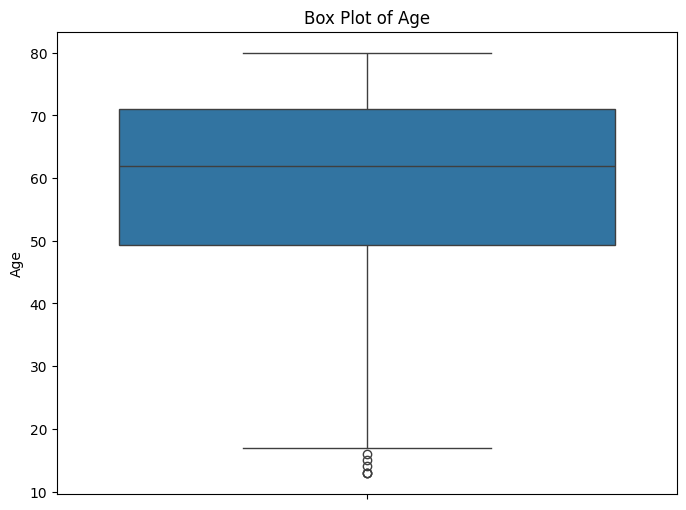

In [77]:
# Box plot for Age_08_04
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age_08_04'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()


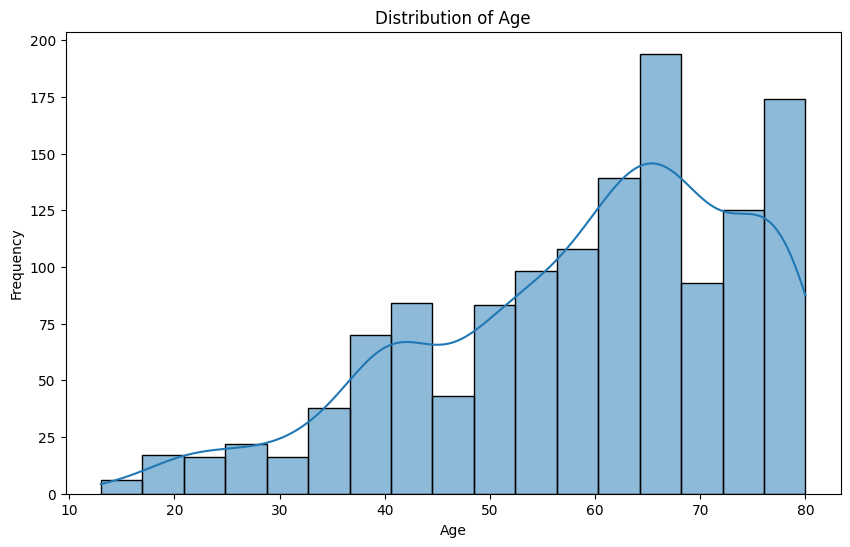

In [78]:
# Distribution plot (histogram and KDE) for Age_08_04
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_08_04'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The  age column seems fine and does not need any modification.


In [79]:
df.drop('Cylinders',axis=1,inplace=True)

Since this column has only one value, we can drop. We drop it as it does not all any value to the model.

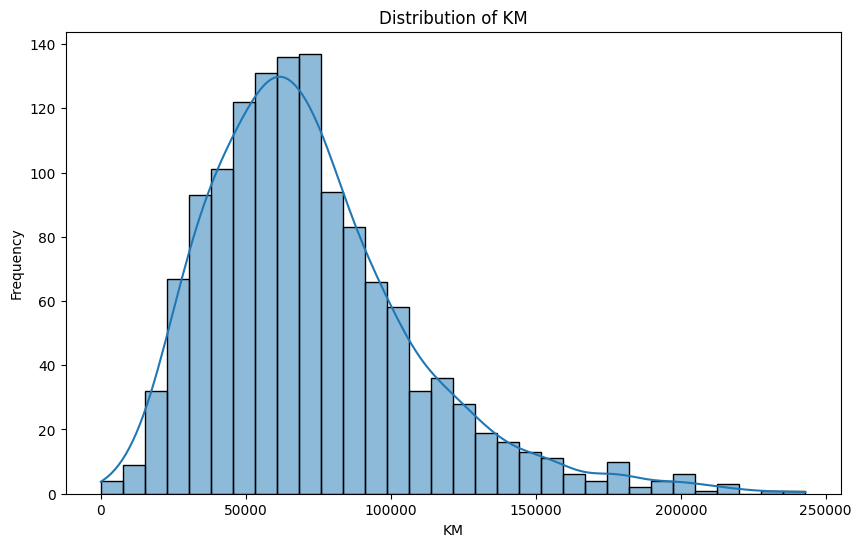

In [80]:
# Distribution plot (histogram and KDE) for Age_08_04
plt.figure(figsize=(10, 6))
sns.histplot(df['KM'], kde=True)
plt.title('Distribution of KM')
plt.xlabel('KM')
plt.ylabel('Frequency')
plt.show()


The KM column seems fine and does not need any modification.


We treat fuel type, automatic, doors and gears as categorical variables.
Age, KM, HP,CC and Weights can be treated as continous variables.

The target variable is the Price column. Since it has continous values as output, we use multiple linear regression to build a model that can predict values as output.

# Model Building with removal of outliers

In [81]:
df.shape

(1326, 10)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df.drop('Price',axis=1)
y = df['Price']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1060, 9), (266, 9), (1060,), (266,))

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [86]:
cat_features = ['Fuel_Type', 'Automatic', 'Doors', 'Gears']
num_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']

In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]
)

In [88]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Lin_model', LinearRegression())
])

In [89]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'cc', 'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Automatic',
                                                   'Doors', 'Gears'])])),
                ('Lin_model', LinearRegression())])

In [90]:
pipeline.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.7940048443749881

In [91]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

In [92]:
from sklearn.model_selection import GridSearchCV

ridge_params = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_cv = GridSearchCV(
    ridge_pipeline,
    ridge_params,
    cv=5,
    scoring='r2'
)

ridge_cv.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_cv.best_params_)
print("Ridge R²:", ridge_cv.score(X_test, y_test))


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best Ridge alpha: {'model__alpha': 100}
Ridge R²: 0.7916184608417792


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [93]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=10000))
])

In [94]:
lasso_params = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_cv = GridSearchCV(
    lasso_pipeline,
    lasso_params,
    cv=5,
    scoring='r2'
)

lasso_cv.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_cv.best_params_)
print("Lasso R²:", lasso_cv.score(X_test, y_test))


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best Lasso alpha: {'model__alpha': 10}
Lasso R²: 0.7976236227495518


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Model Building with outliers

In [95]:
df_unedited.shape

(1436, 11)

In [96]:
df_unedited.drop('Cylinders',axis=1,inplace=True)

In [97]:
df_unedited.shape

(1436, 10)

In [98]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight'],
      dtype='object')

In [99]:
X_unedited = df_unedited.drop('Price', axis=1)
y_unedited = df_unedited['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X_unedited, y_unedited, test_size=0.2, random_state=42
)

# Feature groups
cat_features = ['Fuel_Type', 'Automatic', 'Doors', 'Gears']
num_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]
)

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit only on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
pipeline.score(X_test, y_test)


0.8325855402206834